<a href="https://colab.research.google.com/github/MostafaJahanian/Free_Projects/blob/main/digit_recongnizer_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Data From Kaggle

In [1]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle competitions download -c digit-recognizer

 39% 6.00M/15.3M [00:00<00:00, 61.4MB/s]
100% 15.3M/15.3M [00:00<00:00, 119MB/s] 


In [5]:
! unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Create A Dataset From Data

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import random

In [2]:
data = pd.read_csv('train.csv')
data.shape

(42000, 785)

In [3]:
data.columns[:3]

Index(['label', 'pixel0', 'pixel1'], dtype='object')

In [4]:
images = data.drop('label', axis = 1).values
labels = data['label'].values

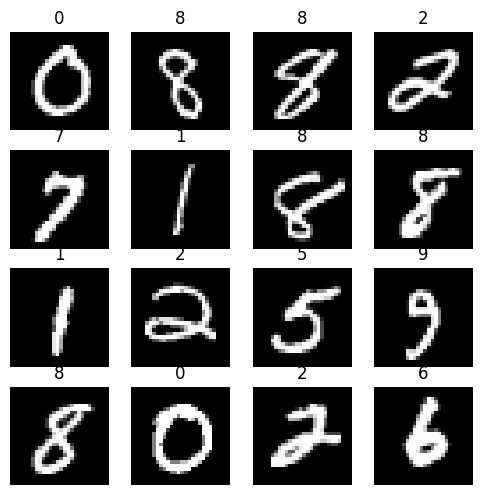

In [5]:
plt.figure(figsize = (6, 6), dpi = 100)
for i in range(16):
  ax = plt.subplot(4, 4, i + 1)
  index = random.randint(0, len(images))
  img = images[index].reshape(28, 28)
  label = labels[index]
  plt.imshow(img, cmap = 'gray')
  plt.title(label)
  plt.axis(False)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 8000, shuffle = True, random_state = 1)
X_train.shape, X_test.shape

((34000, 784), (8000, 784))

In [11]:
np.max(X_train), np.min(X_train)

(255, 0)

## Training CNNs on The Train Images

In [10]:
def plot_training_curves(history_df):
  plt.figure(figsize = (13, 4), dpi = 120)
  ax = plt.subplot(1, 2, 1)
  plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
  plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Cross Entropy')
  plt.grid()
  plt.legend()
  
  ax = plt.subplot(1, 2, 2) 
  plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
  plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid()
  plt.legend()
  plt.show()

In [24]:
tf.random.set_seed(42)

cnn_1 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Reshape((28, 28)),
    layers.Conv1D(filters = 16, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn_1.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_1 = cnn_1.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

Epoch 1/10
904/904 [==============================] - 8s 8ms/step - loss: 0.2832 - accuracy: 0.9138 - val_loss: 0.1387 - val_accuracy: 0.9588
Epoch 2/10
904/904 [==============================] - 6s 7ms/step - loss: 0.1061 - accuracy: 0.9670 - val_loss: 0.1072 - val_accuracy: 0.9684
Epoch 3/10
904/904 [==============================] - 6s 7ms/step - loss: 0.0686 - accuracy: 0.9781 - val_loss: 0.0943 - val_accuracy: 0.9686
Epoch 4/10
904/904 [==============================] - 6s 7ms/step - loss: 0.0508 - accuracy: 0.9833 - val_loss: 0.0815 - val_accuracy: 0.9763
Epoch 5/10
904/904 [==============================] - 7s 7ms/step - loss: 0.0389 - accuracy: 0.9866 - val_loss: 0.0803 - val_accuracy: 0.9751
Epoch 6/10
904/904 [==============================] - 6s 7ms/step - loss: 0.0288 - accuracy: 0.9910 - val_loss: 0.0857 - val_accuracy: 0.9741
Epoch 7/10
904/904 [==============================] - 6s 7ms/step - loss: 0.0232 - accuracy: 0.9924 - val_loss: 0.0892 - val_accuracy: 0.9751
Epoch 

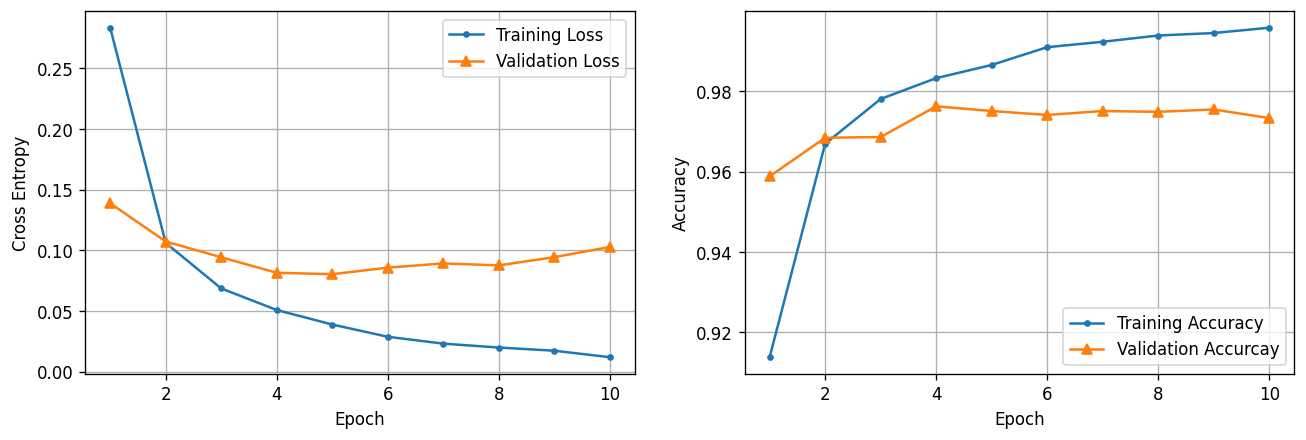

In [25]:
plot_training_curves(pd.DataFrame(history_1.history))

--- There is a sign of overfitting as the curves of validation part of the data connot follow those of the train data after few initial epochs. Aiming to handle this, some techniques are being examined.

In [27]:
tf.random.set_seed(42)

cnn_2 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Reshape((28, 28)),
    layers.Conv1D(filters = 16, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 3),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(1000, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation = 'softmax')
])

cnn_2.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_2 = cnn_2.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

Epoch 1/10
904/904 [==============================] - 7s 7ms/step - loss: 0.4891 - accuracy: 0.8464 - val_loss: 0.1752 - val_accuracy: 0.9482
Epoch 2/10
904/904 [==============================] - 6s 7ms/step - loss: 0.2217 - accuracy: 0.9300 - val_loss: 0.1190 - val_accuracy: 0.9618
Epoch 3/10
904/904 [==============================] - 6s 7ms/step - loss: 0.1729 - accuracy: 0.9442 - val_loss: 0.1107 - val_accuracy: 0.9671
Epoch 4/10
904/904 [==============================] - 6s 7ms/step - loss: 0.1494 - accuracy: 0.9526 - val_loss: 0.0900 - val_accuracy: 0.9727
Epoch 5/10
904/904 [==============================] - 6s 7ms/step - loss: 0.1341 - accuracy: 0.9563 - val_loss: 0.0836 - val_accuracy: 0.9733
Epoch 6/10
904/904 [==============================] - 6s 7ms/step - loss: 0.1238 - accuracy: 0.9609 - val_loss: 0.0724 - val_accuracy: 0.9773
Epoch 7/10
904/904 [==============================] - 6s 7ms/step - loss: 0.1137 - accuracy: 0.9634 - val_loss: 0.0701 - val_accuracy: 0.9784
Epoch 

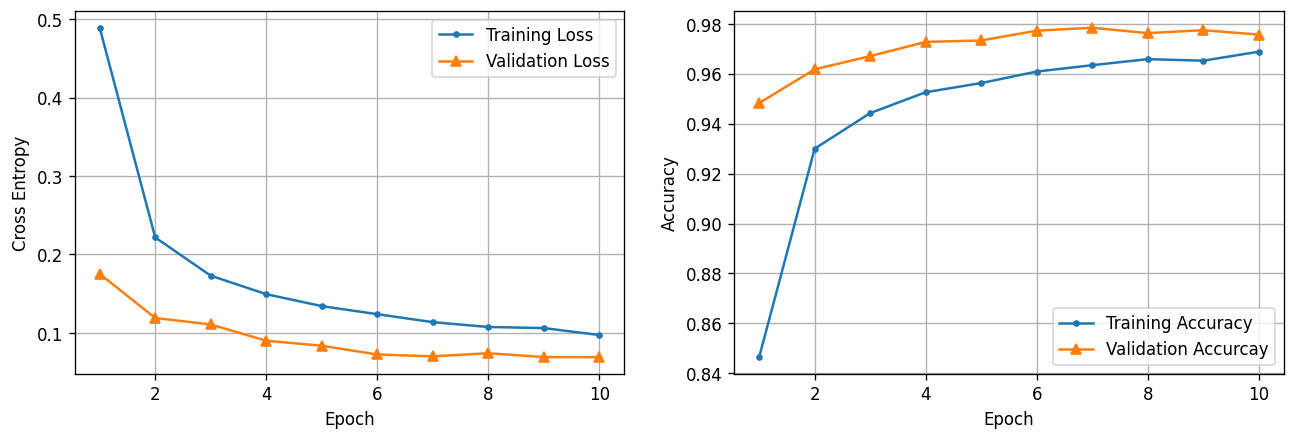

In [28]:
plot_training_curves(pd.DataFrame(history_2.history))

--- Adding dropout layers helped with improving the results of the model regarding the validation set. On the other hand, the model performed worse on training set !!!

In [34]:
tf.random.set_seed(42)

cnn_3 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Reshape((28, 28)),
    layers.Conv1D(filters = 16, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Flatten(),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn_3.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_3 = cnn_3.fit(X_train, y_train, epochs = 20, validation_split = 0.15)

Epoch 1/20
904/904 [==============================] - 9s 9ms/step - loss: 0.2997 - accuracy: 0.9062 - val_loss: 0.1360 - val_accuracy: 0.9582
Epoch 2/20
904/904 [==============================] - 7s 8ms/step - loss: 0.1065 - accuracy: 0.9666 - val_loss: 0.0920 - val_accuracy: 0.9710
Epoch 3/20
904/904 [==============================] - 8s 8ms/step - loss: 0.0724 - accuracy: 0.9770 - val_loss: 0.0974 - val_accuracy: 0.9684
Epoch 4/20
904/904 [==============================] - 9s 9ms/step - loss: 0.0544 - accuracy: 0.9820 - val_loss: 0.0774 - val_accuracy: 0.9761
Epoch 5/20
904/904 [==============================] - 7s 8ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.1024 - val_accuracy: 0.9710
Epoch 6/20
904/904 [==============================] - 9s 10ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0772 - val_accuracy: 0.9776
Epoch 7/20
904/904 [==============================] - 8s 8ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.0792 - val_accuracy: 0.9784
Epoch

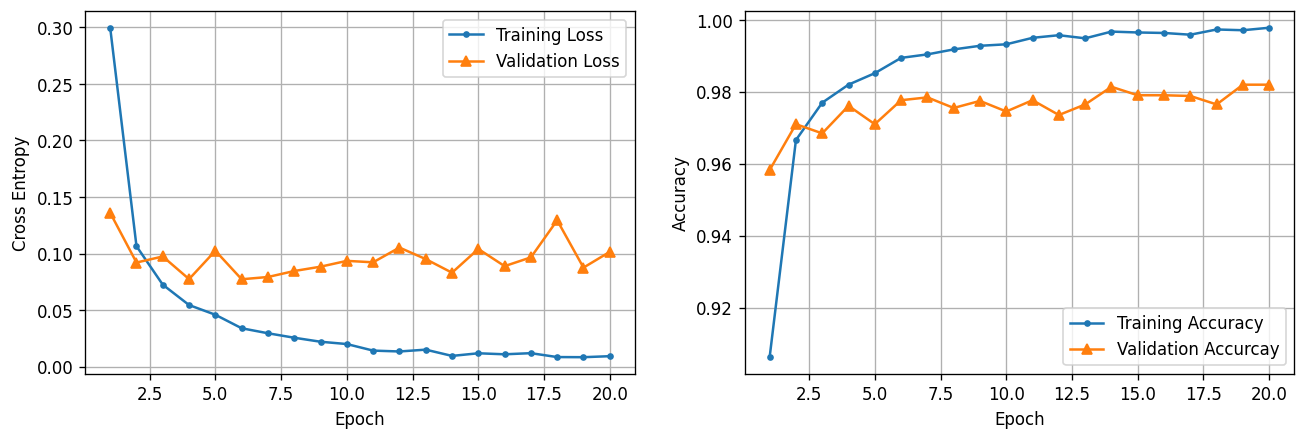

In [35]:
plot_training_curves(pd.DataFrame(history_3.history))

--- Removing Dropout layers and expanding the convilution part of the network, improved the results regarding the accuracy. However, in terms of loss, model performed slightly worse than the previous one. Also, ovrefitting is a significant problem again.

In [36]:
tf.random.set_seed(42)

cnn_4 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Reshape((28, 28)),
    layers.Conv1D(filters = 16, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(1000, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation = 'softmax')
])

cnn_4.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

history_4 = cnn_4.fit(X_train, y_train, epochs = 20, validation_split = 0.15)

Epoch 1/20
904/904 [==============================] - 54s 9ms/step - loss: 0.3904 - accuracy: 0.8769 - val_loss: 0.1624 - val_accuracy: 0.9525
Epoch 2/20
904/904 [==============================] - 8s 9ms/step - loss: 0.1650 - accuracy: 0.9488 - val_loss: 0.1062 - val_accuracy: 0.9669
Epoch 3/20
904/904 [==============================] - 8s 9ms/step - loss: 0.1172 - accuracy: 0.9629 - val_loss: 0.0851 - val_accuracy: 0.9743
Epoch 4/20
904/904 [==============================] - 8s 9ms/step - loss: 0.1025 - accuracy: 0.9673 - val_loss: 0.0870 - val_accuracy: 0.9733
Epoch 5/20
904/904 [==============================] - 8s 9ms/step - loss: 0.0894 - accuracy: 0.9715 - val_loss: 0.0746 - val_accuracy: 0.9794
Epoch 6/20
904/904 [==============================] - 8s 9ms/step - loss: 0.0793 - accuracy: 0.9745 - val_loss: 0.0720 - val_accuracy: 0.9780
Epoch 7/20
904/904 [==============================] - 8s 9ms/step - loss: 0.0739 - accuracy: 0.9769 - val_loss: 0.0822 - val_accuracy: 0.9751
Epoch

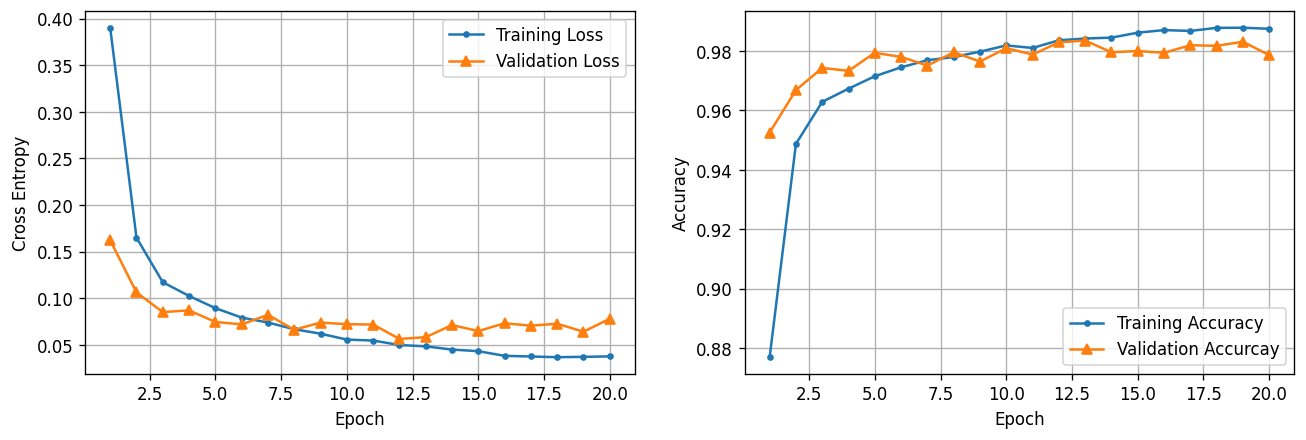

In [37]:
plot_training_curves(pd.DataFrame(history_4.history))

--- Adding the Dropout layers to the previous model, the overfitting problem has been tackled correctly. Now the curves of both validation and training sets are acting quite the same.

--- In order to improve the model, some changes are being applied on the convolution part, as well as the preprocessing part of the network.

In [48]:
tf.random.set_seed(42)

cnn_5 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Reshape((28, 28)),
    layers.Conv1D(filters = 16, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Conv1D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(1000, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation = 'softmax')
])

cnn_5.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

def scheduler_func(epoch):
  if epoch < 10:
    return 0.001
  return 0.001 / epoch

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler_func)

history_5 = cnn_5.fit(X_train, y_train, epochs = 20, validation_split = 0.15, callbacks = [lr_scheduler])

Epoch 1/20
904/904 [==============================] - 11s 11ms/step - loss: 0.3904 - accuracy: 0.8769 - val_loss: 0.1624 - val_accuracy: 0.9525 - lr: 0.0010
Epoch 2/20
904/904 [==============================] - 9s 10ms/step - loss: 0.1650 - accuracy: 0.9488 - val_loss: 0.1062 - val_accuracy: 0.9669 - lr: 0.0010
Epoch 3/20
904/904 [==============================] - 8s 9ms/step - loss: 0.1172 - accuracy: 0.9629 - val_loss: 0.0851 - val_accuracy: 0.9743 - lr: 0.0010
Epoch 4/20
904/904 [==============================] - 9s 9ms/step - loss: 0.1025 - accuracy: 0.9673 - val_loss: 0.0870 - val_accuracy: 0.9733 - lr: 0.0010
Epoch 5/20
904/904 [==============================] - 9s 10ms/step - loss: 0.0894 - accuracy: 0.9715 - val_loss: 0.0746 - val_accuracy: 0.9794 - lr: 0.0010
Epoch 6/20
904/904 [==============================] - 9s 9ms/step - loss: 0.0793 - accuracy: 0.9745 - val_loss: 0.0720 - val_accuracy: 0.9780 - lr: 0.0010
Epoch 7/20
904/904 [==============================] - 9s 10ms/step

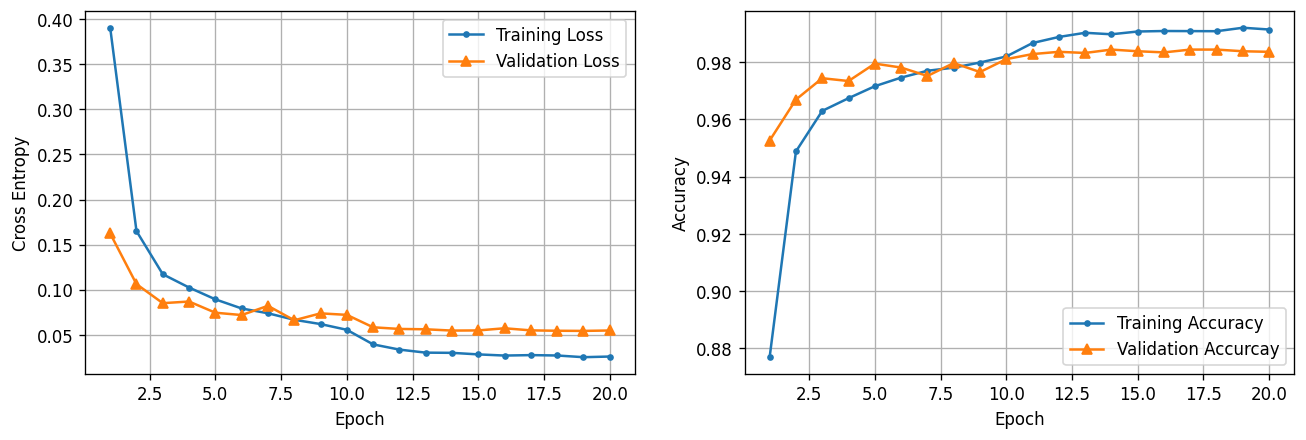

In [49]:
plot_training_curves(pd.DataFrame(history_5.history))

--- Adding a Learning Rate Scheduler helped with achieving consistent performance throughout the training session. 

In [50]:
tf.random.set_seed(42)

cnn_6 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Reshape((28, 28)),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(1000, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation = 'softmax')
])

cnn_6.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

def scheduler_func(epoch):
  if epoch < 10:
    return 0.001
  return 0.001 / epoch

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler_func)

history_6 = cnn_6.fit(X_train, y_train, epochs = 20, validation_split = 0.15, callbacks = [lr_scheduler])

Epoch 1/20
904/904 [==============================] - 12s 13ms/step - loss: 0.2993 - accuracy: 0.9052 - val_loss: 0.1222 - val_accuracy: 0.9633 - lr: 0.0010
Epoch 2/20
904/904 [==============================] - 11s 12ms/step - loss: 0.1168 - accuracy: 0.9636 - val_loss: 0.0836 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 3/20
904/904 [==============================] - 11s 12ms/step - loss: 0.0886 - accuracy: 0.9706 - val_loss: 0.0721 - val_accuracy: 0.9784 - lr: 0.0010
Epoch 4/20
904/904 [==============================] - 11s 12ms/step - loss: 0.0744 - accuracy: 0.9753 - val_loss: 0.0622 - val_accuracy: 0.9806 - lr: 0.0010
Epoch 5/20
904/904 [==============================] - 11s 12ms/step - loss: 0.0630 - accuracy: 0.9801 - val_loss: 0.0586 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 6/20
904/904 [==============================] - 11s 12ms/step - loss: 0.0553 - accuracy: 0.9822 - val_loss: 0.0560 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 7/20
904/904 [==============================] - 11s 

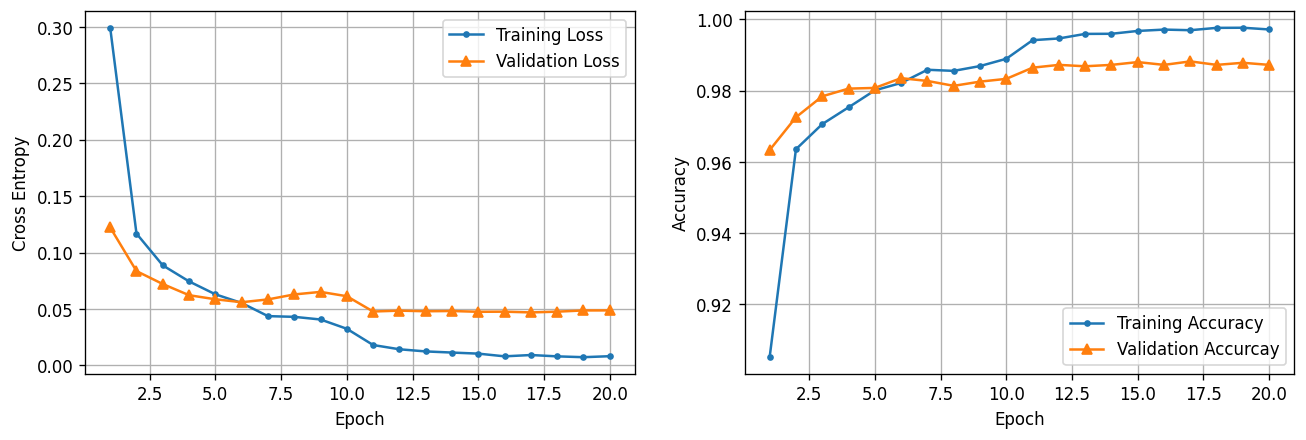

In [51]:
plot_training_curves(pd.DataFrame(history_6.history))

--- The model above has a different configuration in the convolution part of the netwrok in comparison with former models. The exact difference is that the number of filter in Conv1D layers has been doubled.

In [56]:
def compare_models(history_1, history_2, label_1, label_2):
  plt.figure(figsize = (13, 4), dpi = 120)

  ax = plt.subplot(1, 2, 1)
  plt.plot(range(1, 21), pd.DataFrame(history_1.history)['val_loss'], label = label_1)
  plt.plot(range(1, 21), pd.DataFrame(history_2.history)['val_loss'], label = label_2)
  plt.xlabel('Epoch')
  plt.ylabel('Cross Entropy')
  plt.grid()
  plt.legend()
  
  ax = plt.subplot(1, 2, 2)
  plt.plot(range(1, 21), pd.DataFrame(history_1.history)['val_accuracy'], label = label_1)
  plt.plot(range(1, 21), pd.DataFrame(history_2.history)['val_accuracy'], label = label_2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid()
  plt.legend()

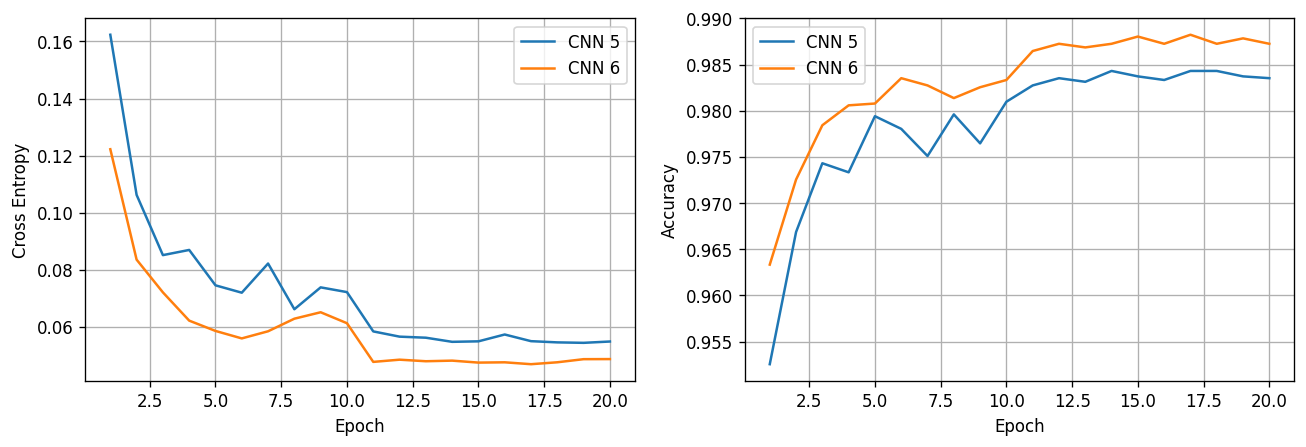

In [57]:
compare_models(history_5, history_6, 'CNN 5', 'CNN 6')

--- It is obvious that the latest model is considerably better than its counterparts.

In [53]:
tf.random.set_seed(42)

cnn_7 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Reshape((28, 28)),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(1000, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation = 'softmax')
])

cnn_7.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

def scheduler_func(epoch):
  if epoch < 10:
    return 0.001
  return 0.001 / (epoch - 8)

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler_func)

history_7 = cnn_7.fit(X_train, y_train, epochs = 20, validation_split = 0.15, callbacks = [lr_scheduler])

Epoch 1/20
904/904 [==============================] - 13s 13ms/step - loss: 0.2993 - accuracy: 0.9052 - val_loss: 0.1222 - val_accuracy: 0.9633 - lr: 0.0010
Epoch 2/20
904/904 [==============================] - 12s 13ms/step - loss: 0.1168 - accuracy: 0.9636 - val_loss: 0.0836 - val_accuracy: 0.9725 - lr: 0.0010
Epoch 3/20
904/904 [==============================] - 12s 13ms/step - loss: 0.0886 - accuracy: 0.9706 - val_loss: 0.0721 - val_accuracy: 0.9784 - lr: 0.0010
Epoch 4/20
904/904 [==============================] - 14s 16ms/step - loss: 0.0744 - accuracy: 0.9753 - val_loss: 0.0622 - val_accuracy: 0.9806 - lr: 0.0010
Epoch 5/20
904/904 [==============================] - 12s 13ms/step - loss: 0.0630 - accuracy: 0.9801 - val_loss: 0.0586 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 6/20
904/904 [==============================] - 13s 14ms/step - loss: 0.0553 - accuracy: 0.9822 - val_loss: 0.0560 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 7/20
904/904 [==============================] - 12s 

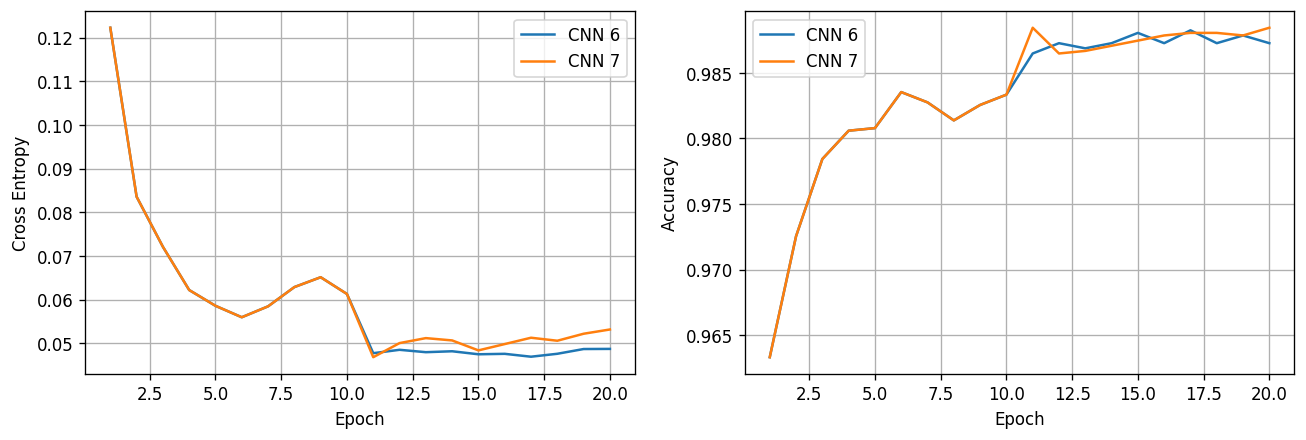

In [58]:
compare_models(history_6, history_7, 'CNN 6', 'CNN 7')

--- As the plots above suggest, the former config for lr scheduler yields better results.

In [62]:
tf.random.set_seed(42)

cnn_8 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Reshape((28, 28)),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(2000, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation = 'softmax')
])

cnn_8.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

def scheduler_func(epoch):
  if epoch < 10:
    return 0.001
  return 0.001 / epoch

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler_func)

history_8 = cnn_8.fit(X_train, y_train, epochs = 20, validation_split = 0.15, callbacks = [lr_scheduler])

Epoch 1/20
904/904 [==============================] - 19s 20ms/step - loss: 0.2811 - accuracy: 0.9110 - val_loss: 0.1190 - val_accuracy: 0.9616 - lr: 0.0010
Epoch 2/20
904/904 [==============================] - 15s 16ms/step - loss: 0.1139 - accuracy: 0.9638 - val_loss: 0.0838 - val_accuracy: 0.9739 - lr: 0.0010
Epoch 3/20
904/904 [==============================] - 15s 16ms/step - loss: 0.0859 - accuracy: 0.9731 - val_loss: 0.0733 - val_accuracy: 0.9778 - lr: 0.0010
Epoch 4/20
904/904 [==============================] - 15s 16ms/step - loss: 0.0712 - accuracy: 0.9766 - val_loss: 0.0600 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 5/20
904/904 [==============================] - 15s 16ms/step - loss: 0.0602 - accuracy: 0.9809 - val_loss: 0.0664 - val_accuracy: 0.9798 - lr: 0.0010
Epoch 6/20
904/904 [==============================] - 15s 16ms/step - loss: 0.0521 - accuracy: 0.9834 - val_loss: 0.0597 - val_accuracy: 0.9814 - lr: 0.0010
Epoch 7/20
904/904 [==============================] - 16s 

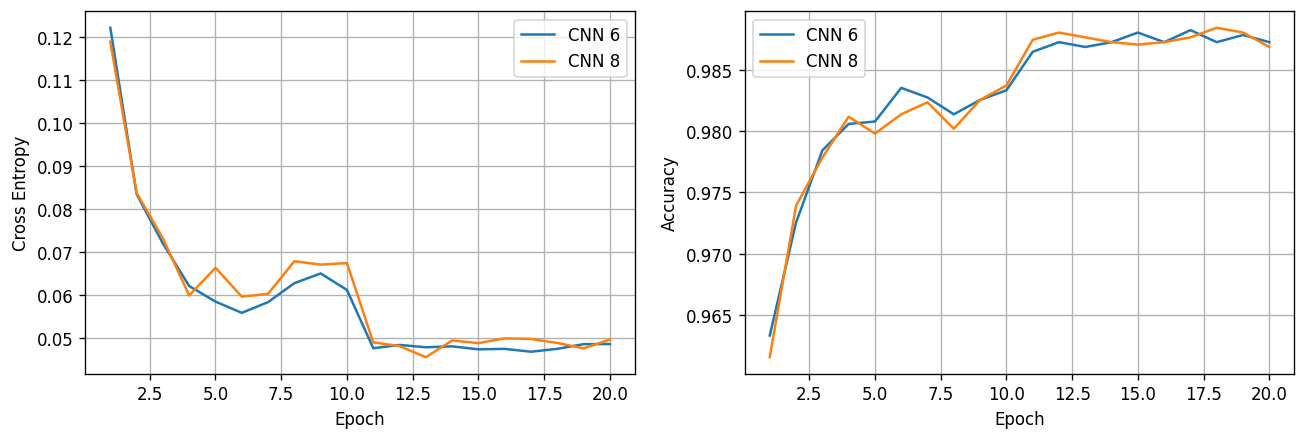

In [63]:
compare_models(history_6, history_8, 'CNN 6', 'CNN 8')

--- Icreasing the number of units in the only Dense layer of the model did not affect the results significantly. The behaviour of the curves are similar to those of the "cnn_6", and just some flactuations has been added to them.

In [64]:
tf.random.set_seed(42)

cnn_9 = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Reshape((28, 28)),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.35),
    layers.Dense(1000, activation = 'relu'),
    layers.Dropout(0.35),
    layers.Dense(10, activation = 'softmax')
])

cnn_9.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

def scheduler_func(epoch):
  if epoch < 10:
    return 0.001
  return 0.001 / epoch

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler_func)

history_9 = cnn_9.fit(X_train, y_train, epochs = 20, validation_split = 0.15, callbacks = [lr_scheduler])

Epoch 1/20
904/904 [==============================] - 12s 13ms/step - loss: 0.3343 - accuracy: 0.8952 - val_loss: 0.1297 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 2/20
904/904 [==============================] - 11s 12ms/step - loss: 0.1400 - accuracy: 0.9552 - val_loss: 0.0869 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 3/20
904/904 [==============================] - 11s 12ms/step - loss: 0.1079 - accuracy: 0.9644 - val_loss: 0.0731 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 4/20
904/904 [==============================] - 11s 12ms/step - loss: 0.0875 - accuracy: 0.9718 - val_loss: 0.0643 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 5/20
904/904 [==============================] - 11s 12ms/step - loss: 0.0779 - accuracy: 0.9737 - val_loss: 0.0592 - val_accuracy: 0.9827 - lr: 0.0010
Epoch 6/20
904/904 [==============================] - 11s 12ms/step - loss: 0.0661 - accuracy: 0.9787 - val_loss: 0.0583 - val_accuracy: 0.9816 - lr: 0.0010
Epoch 7/20
904/904 [==============================] - 12s 

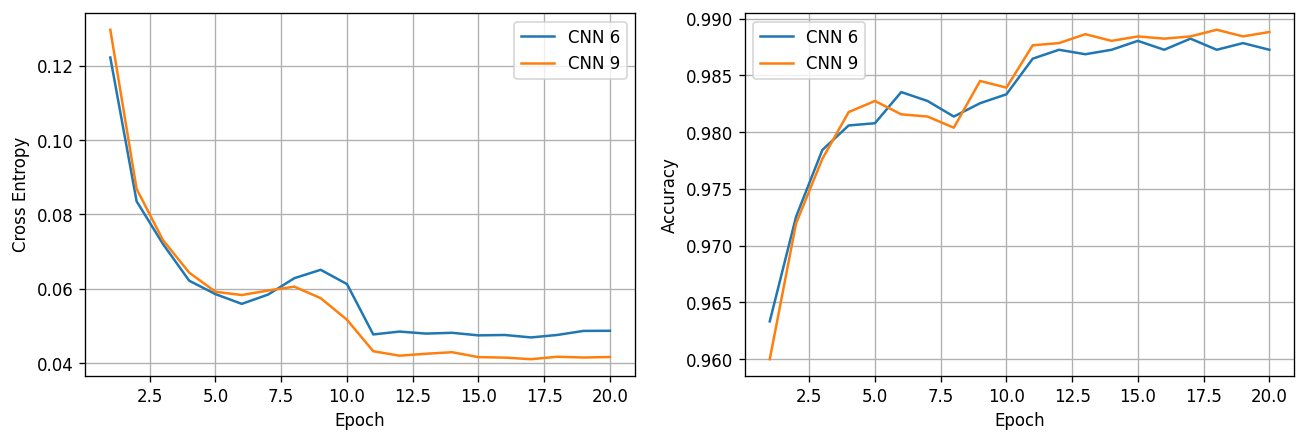

In [65]:
compare_models(history_6, history_9, 'CNN 6', 'CNN 9')

--- It is bovious that with this new configuration, the performance is much better.

--- After several trial and errors, I realized that this model cannot go much further, at least with my knowledge and skills at this time. Thus, this structure is being examined for the best possible result.

## Saving The Best Model

In [78]:
tf.random.set_seed(42)

cnn = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Reshape((28, 28)),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.35),
    layers.Dense(1000, activation = 'relu'),
    layers.Dropout(0.35),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

def scheduler_func(epoch):
  if epoch < 10:
    return 0.001 
  return 0.001 / epoch

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler_func)

history_cnn = cnn.fit(X_train, y_train, epochs = 40, validation_split = 0.15, callbacks = [lr_scheduler])

Epoch 1/40
904/904 [==============================] - 12s 12ms/step - loss: 0.3343 - accuracy: 0.8952 - val_loss: 0.1297 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 2/40
904/904 [==============================] - 11s 12ms/step - loss: 0.1400 - accuracy: 0.9552 - val_loss: 0.0869 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 3/40
904/904 [==============================] - 11s 12ms/step - loss: 0.1079 - accuracy: 0.9644 - val_loss: 0.0731 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 4/40
904/904 [==============================] - 11s 12ms/step - loss: 0.0875 - accuracy: 0.9718 - val_loss: 0.0643 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 5/40
904/904 [==============================] - 10s 12ms/step - loss: 0.0779 - accuracy: 0.9737 - val_loss: 0.0592 - val_accuracy: 0.9827 - lr: 0.0010
Epoch 6/40
904/904 [==============================] - 11s 12ms/step - loss: 0.0661 - accuracy: 0.9787 - val_loss: 0.0583 - val_accuracy: 0.9816 - lr: 0.0010
Epoch 7/40
904/904 [==============================] - 11s 

In [81]:
history_df = pd.DataFrame(history_cnn.history)
history_df.sort_values(by = 'val_loss')

,loss,accuracy,val_loss,val_accuracy,lr
16,0.017317,0.994360,0.041063,0.988431,0.000063
33,0.011321,0.996159,0.041397,0.989216,0.000030
23,0.014369,0.994948,0.041405,0.989804,0.000043
29,0.011829,0.995848,0.041422,0.988824,0.000034
15,0.017502,0.994014,0.041484,0.988235,0.000067
18,0.015382,0.994810,0.041517,0.988431,0.000056
34,0.011728,0.996021,0.041529,0.989020,0.000029
14,0.018597,0.994394,0.041623,0.988431,0.000071
19,0.016032,0.994740,0.041654,0.988824,0.000053
32,0.011699,0.996228,0.041701,0.989412,0.000031


In [85]:
history_df.sort_values(by = 'val_accuracy', ascending = False)

,loss,accuracy,val_loss,val_accuracy,lr
23,0.014369,0.994948,0.041405,0.989804,0.000043
27,0.012489,0.995606,0.042002,0.989804,0.000037
31,0.012068,0.996090,0.042168,0.989608,0.000032
32,0.011699,0.996228,0.041701,0.989412,0.000031
22,0.014005,0.995156,0.043292,0.989412,0.000045
38,0.010769,0.996332,0.042745,0.989216,0.000026
33,0.011321,0.996159,0.041397,0.989216,0.000030
25,0.015184,0.994879,0.042472,0.989020,0.000040
39,0.011889,0.995744,0.042198,0.989020,0.000026
17,0.015730,0.994498,0.041721,0.989020,0.000059


--- From all the epochs, the 24th epoch has the highest "val_accuracy" and the third least "val_loss". I personally prefer this model as its loss is not much higher than the model with the least "val_loss".

In [84]:
from google.colab import drive
drive.mount('/content/grdive')

Mounted at /content/grdive


In [86]:
tf.random.set_seed(42)

cnn = keras.Sequential([
    layers.Rescaling(1./255),
    layers.Reshape((28, 28)),
    layers.Conv1D(filters = 32, kernel_size = 3, activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Conv1D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling1D(pool_size = 2),
    layers.Flatten(),
    layers.Dropout(0.35),
    layers.Dense(1000, activation = 'relu'),
    layers.Dropout(0.35),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(),
    metrics = 'accuracy'
)

def scheduler_func(epoch):
  if epoch < 10:
    return 0.001 
  return 0.001 / epoch

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler_func)
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath = '/content/grdive/MyDrive/digit_recognizer.hdf5',
                                                   monitor = 'val_accuracy',
                                                   mode = 'max',
                                                   verbose = 0,
                                                   save_best_only = True,
                                                   save_weights_only = False
                                                   )

cnn.fit(X_train, y_train, epochs = 40, validation_split = 0.15, callbacks = [lr_scheduler, model_checkpoint])

Epoch 1/40
904/904 [==============================] - 13s 13ms/step - loss: 0.3343 - accuracy: 0.8952 - val_loss: 0.1297 - val_accuracy: 0.9600 - lr: 0.0010
Epoch 2/40
904/904 [==============================] - 11s 12ms/step - loss: 0.1400 - accuracy: 0.9552 - val_loss: 0.0869 - val_accuracy: 0.9720 - lr: 0.0010
Epoch 3/40
904/904 [==============================] - 13s 14ms/step - loss: 0.1079 - accuracy: 0.9644 - val_loss: 0.0731 - val_accuracy: 0.9776 - lr: 0.0010
Epoch 4/40
904/904 [==============================] - 11s 12ms/step - loss: 0.0875 - accuracy: 0.9718 - val_loss: 0.0643 - val_accuracy: 0.9818 - lr: 0.0010
Epoch 5/40
904/904 [==============================] - 11s 12ms/step - loss: 0.0779 - accuracy: 0.9737 - val_loss: 0.0592 - val_accuracy: 0.9827 - lr: 0.0010
Epoch 6/40
904/904 [==============================] - 11s 12ms/step - loss: 0.0661 - accuracy: 0.9787 - val_loss: 0.0583 - val_accuracy: 0.9816 - lr: 0.0010
Epoch 7/40
904/904 [==============================] - 11s 

## Evaluating The Best Model

In [87]:
model = keras.models.load_model('/content/grdive/MyDrive/digit_recognizer.hdf5')
model.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_42 (Rescaling)    (None, 784)               0         
                                                                 
 reshape_35 (Reshape)        (None, 28, 28)            0         
                                                                 
 conv1d_68 (Conv1D)          (None, 26, 32)            2720      
                                                                 
 max_pooling1d_66 (MaxPoolin  (None, 13, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_69 (Conv1D)          (None, 13, 64)            6208      
                                                                 
 max_pooling1d_67 (MaxPoolin  (None, 6, 64)            0         
 g1D)                                                

In [88]:
model.evaluate(X_test, y_test)

250/250 [==============================] - 2s 9ms/step - loss: 0.0440 - accuracy: 0.9898


[0.04400797188282013, 0.9897500276565552]

--- The performance of the model on the test set is not inferior to those of the other sets. That is to say, the final model is acceptable and satisfying.

In [89]:
y_pred = np.argmax(model.predict(X_test), axis = 1)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       814
           1       1.00      1.00      1.00       900
           2       0.98      0.99      0.99       789
           3       0.99      0.98      0.99       832
           4       0.99      0.99      0.99       793
           5       0.99      0.99      0.99       703
           6       0.99      1.00      0.99       762
           7       0.99      0.99      0.99       806
           8       0.99      0.98      0.99       798
           9       0.98      0.99      0.98       803

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



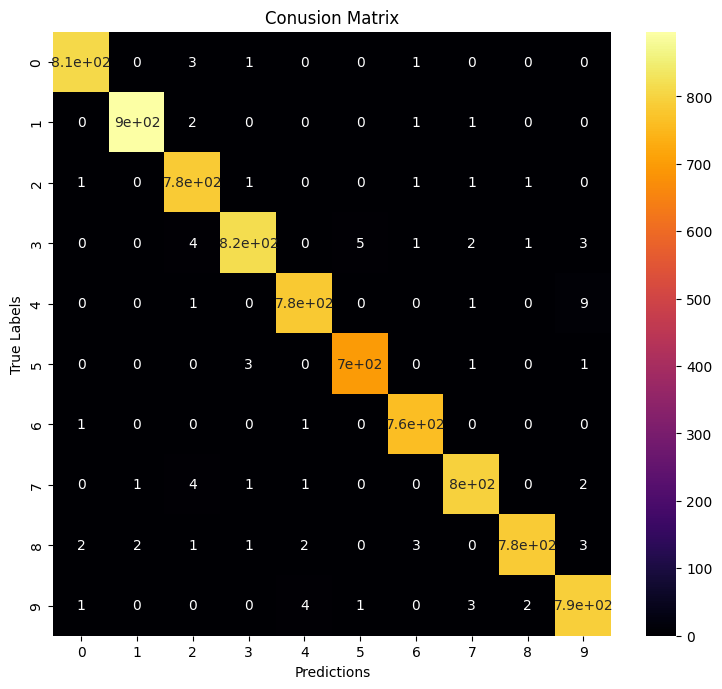

In [90]:
plt.figure(figsize = (9, 8), dpi = 100)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot = True, cmap = 'inferno')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.title('Conusion Matrix')
plt.show()

In [113]:
# plot random images from a given dataset, and compare predictions with ground truth
def plot_random_predictions(images, labels, model):
  y_pred_proba = model.predict(images)

  plt.figure(figsize = (9, 9), dpi = 120)
  for i in range(16):
    index = random.randint(0, len(images))
    ax = plt.subplot(4, 4, i + 1)

    img = images[index].reshape(28, 28)
    y_true = labels[index]
    y_pred = np.argmax(y_pred_proba[index])
    
    c = 'g' if y_pred == y_true else 'r'
    
    plt.imshow(img, cmap = 'gray')
    plt.title(f'Predicted : {y_pred}\nTrue label : {y_true}', c = c, fontsize = 8)
    plt.axis(False)

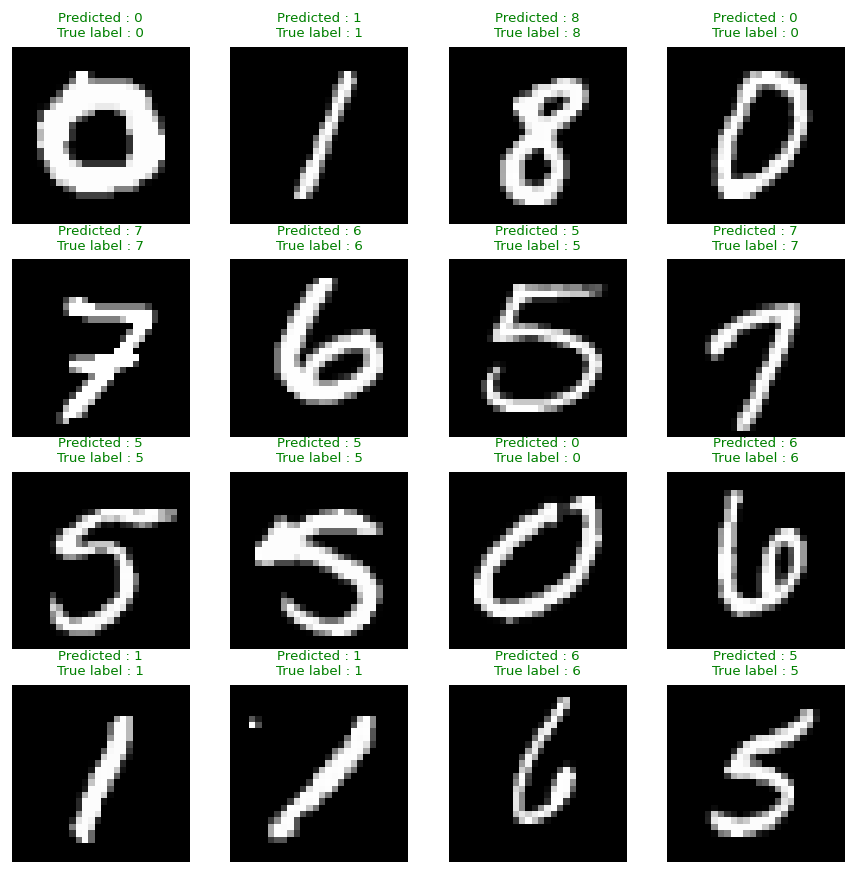

In [116]:
plot_random_predictions(X_test, y_test, model)

## Predicting The Competition Set

In [136]:
competition_images = pd.read_csv('test.csv')
competition_images.shape

(28000, 784)

In [137]:
competition_submission_file = pd.DataFrame(np.arange(1, 28001).reshape(-1, 1), columns = ['ImageId'])

In [138]:
competition_labels = np.argmax(model.predict(competition_images), axis = 1).reshape(-1, 1)
competition_submission_file['Label'] = competition_labels
competition_submission_file.sample(10)

,ImageId,Label
3199,3200,8
25768,25769,3
18906,18907,3
17479,17480,5
19591,19592,4
10699,10700,8
9056,9057,1
9030,9031,3
25255,25256,5
9936,9937,0


In [139]:
competition_submission_file.to_csv('/content/grdive/MyDrive/Kaggle_digit_recognizer.csv', index = False)

--- The model has an acuuracy of 0.98685 on the competition images.